In [79]:
import matplotlib.pyplot as plt
import numpy as np

#### Naive method

In [80]:
def lagrange(x, i, xm):
    n = len(xm) - 1
    y = 1
    for j in range(n+1):
        if i != j:
            y *= (x-xm[j]) / (xm[i]-xm[j])
        
    return y

In [81]:
def interpolate(x, xm, ym):
    n = len(xm) - 1
    lagrpoly = np.array([lagrange(x, i, xm) for i in range(n+1)])
    y = np.dot(ym, lagrpoly)
    return y

In [82]:
interpolate(2, x, y)

2.4404761904761907

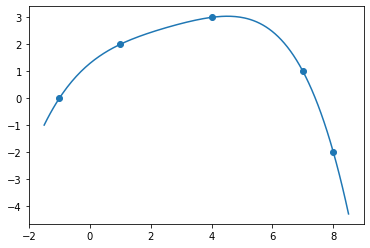

In [88]:
x = [-1, 1, 4, 7, 8]
y = [0, 2, 3, 1, -2]

xp = np.linspace(-1.5, 8.5, 200)

plt.scatter(x,y)
plt.plot(xp, interpolate(xp, x, y))
plt.show()

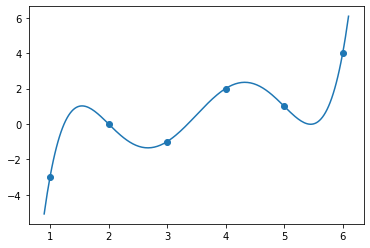

In [87]:
x = [1, 2, 3, 4, 5, 6]
y = [-3, 0, -1, 2, 1, 4]

xp = np.linspace(0.9, 6.1, 200)

plt.scatter(x,y)
plt.plot(xp, interpolate(xp, x, y))
plt.show()

#### Computing barycentric weights

In [89]:
x = [1, 2, 3, 4, 5, 6]
y = [-3, 0, -1, 2, 1, 4]

In [91]:
w = [0] * len(x)
wy = [0] * len(x)

for j in range(len(w)):
    w[j] = 1 / np.prod([x[j] - x[i] for i in range(len(w)) if j != i])
    wy[j] = w[j] * y[j]

In [94]:
def p(xp, w, wy):
    a = sum([wy[j] / (xp - x[j]) for j in range(len(w))])
    b = sum([w[j] / (xp - x[j]) for j in range(len(w))])
    return a / b

In [96]:
p(2.5, w, wy)

-1.25

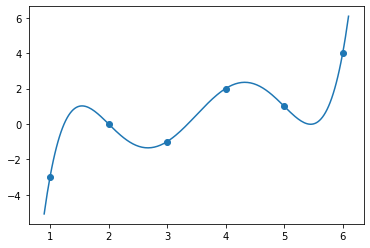

In [101]:
x = [1, 2, 3, 4, 5, 6]
y = [-3, 0, -1, 2, 1, 4]

xp = np.linspace(0.9, 6.1, 200)

plt.scatter(x,y)
plt.plot(xp, p(xp, w, wy))
plt.show()